In [1]:
import numpy as np
import jax
from jax.scipy import stats
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [16]:
n, d = 10_000, 5
x1 = np.random.normal(0., 1., size=n)
x2 = []
for _ in range(d-1):
    x2.append(np.random.normal(0., jnp.exp(2. * x1)))
x2 = np.vstack(x2)
samples = {'x1': x1.reshape(1, n), 'x2': x2.T.reshape(1, n, d-1)}

from distributions import NealsFunnel
from mcmc_utils import stein_disc

dist = NealsFunnel(d=d)
stein = stein_disc(samples, dist.logprob_fn, beta=-1/2)
print(stein)

(DeviceArray(0.14344235, dtype=float32), DeviceArray(0.48180607, dtype=float32))


In [20]:
def compare_plots(i):
    samples = jnp.load('nealsfunnel_ncoupling_kld_relu_5.npz', allow_pickle=True)
    ess = samples['ess_samples'].item()
    atess = samples['atess_samples'].item()
    nuts = samples['nuts_samples'].item()
    neutra = samples['neutra_samples'].item()
    
#     np.random.seed(0)
    c, n = ess["x1"].shape
    
    x1 = np.random.normal(0., 1., size=c * n)
    x2 = []
    for _ in range(d-1):
        x2.append(np.random.normal(0., jnp.exp(2. * x1)))
    x2 = np.vstack(x2).T
    samples = {'x1': x1.reshape(1, n), 'x2': x2.reshape(1, n, d-1)}
    dist = NealsFunnel(d=d)
    stein = stein_disc(samples, dist.logprob_fn, beta=-1/2)
    print(stein)
    
#     x1 = np.random.normal(0., 1., size=c * n)
#     x2 = np.random.normal(0., jnp.exp(2. * x1))
    
    fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    ax[0].plot(x1, x2[:, i], '.', color='r', alpha=1.)
    ax[0].plot(ess["x1"].reshape(-1), ess["x2"].reshape(-1, d-1)[:, i], '.', alpha=1)
    ax[1].set_title("ATESS (h=2) samples")
    ax[1].plot(x1, x2[:, i], '.', color='r', alpha=1)
    ax[1].plot(atess["x1"].reshape(-1), atess["x2"].reshape(-1, d-1)[:, i], '.', alpha=1)
    ax[2].set_title("NUTS samples")
    ax[2].plot(x1, x2[:, i], '.', color='r', alpha=1)
    ax[2].plot(nuts["x1"].reshape(-1), nuts["x2"].reshape(-1, d-1)[:, i], '.', alpha=1)
    ax[3].set_title("NeuTra samples")
    ax[3].plot(x1, x2[:, i], '.', color='r', alpha=1)
    ax[3].plot(neutra["x1"].reshape(-1), neutra["x2"].reshape(-1, d-1)[:, i], '.', alpha=1)

    ax[3].set_ylim(-100, 100)

(DeviceArray(0.10212501, dtype=float32), DeviceArray(0.49051, dtype=float32))
(DeviceArray(-0.23539986, dtype=float32), DeviceArray(0.58731055, dtype=float32))
(DeviceArray(0.14375061, dtype=float32), DeviceArray(1.0004239, dtype=float32))
(DeviceArray(-0.13653012, dtype=float32), DeviceArray(0.13213558, dtype=float32))


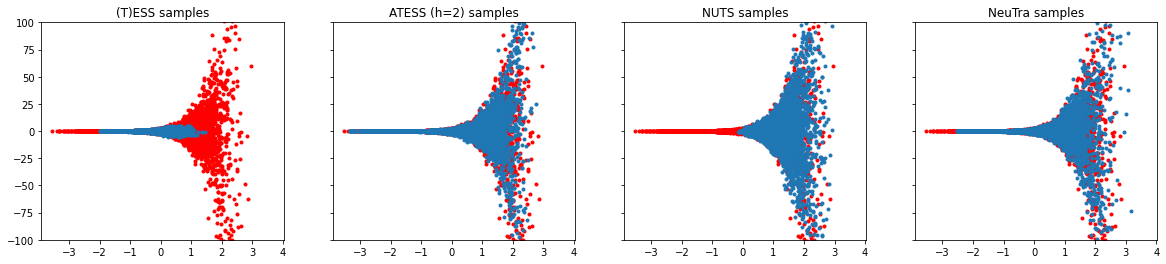

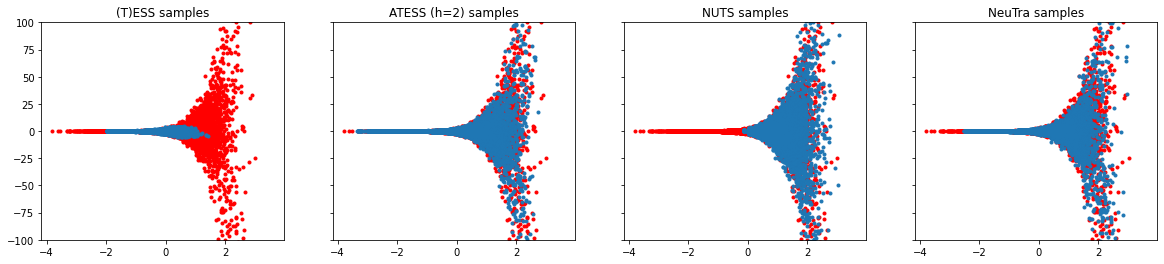

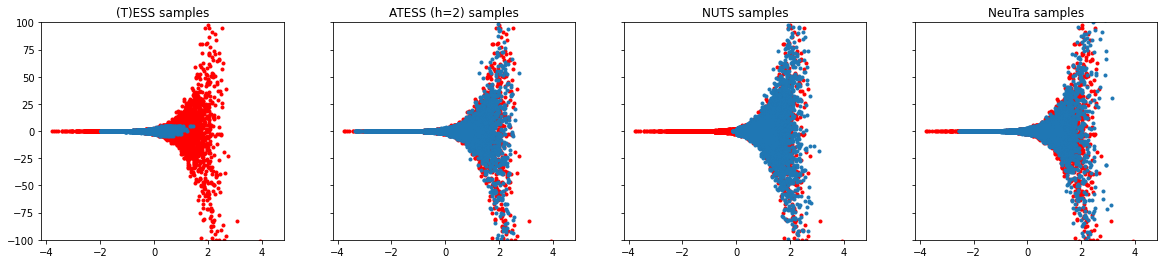

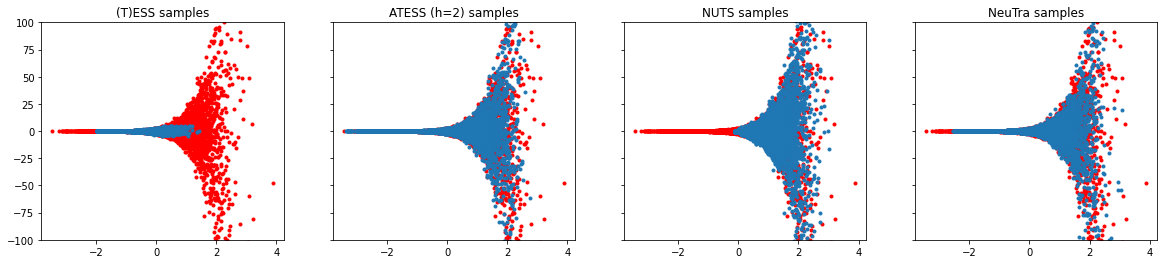

In [22]:
for i in range(d-1):
    compare_plots(i)

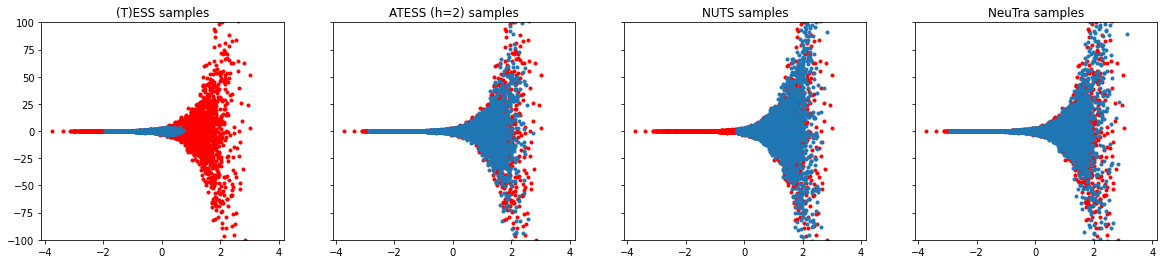

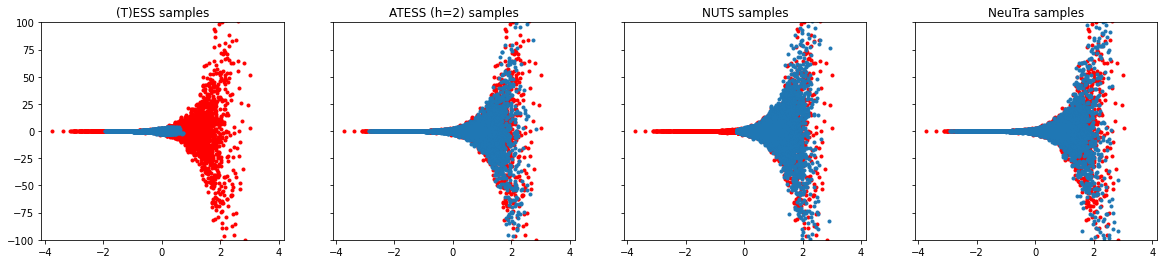

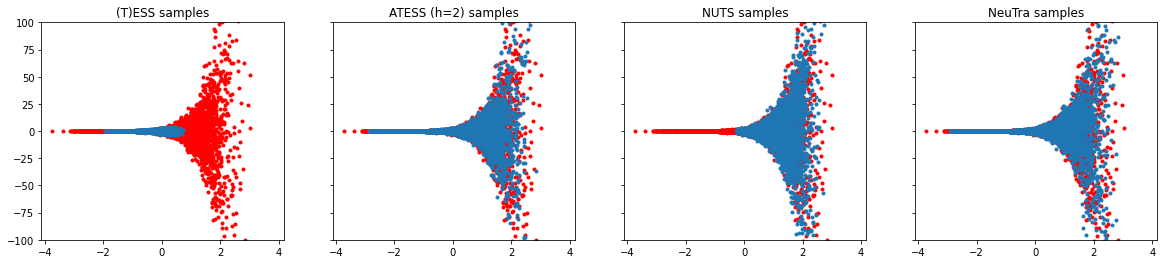

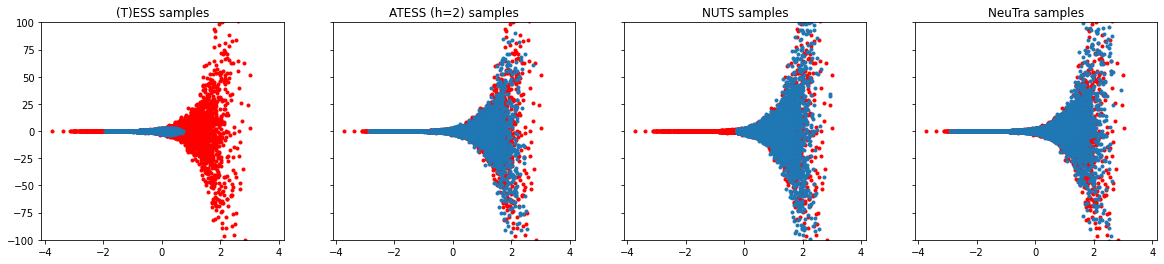

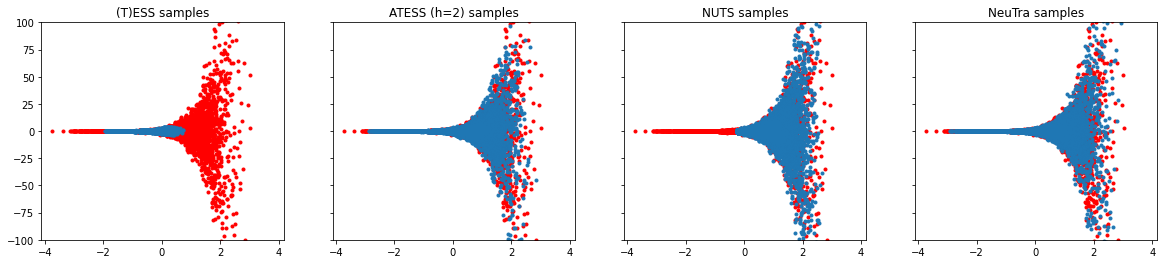

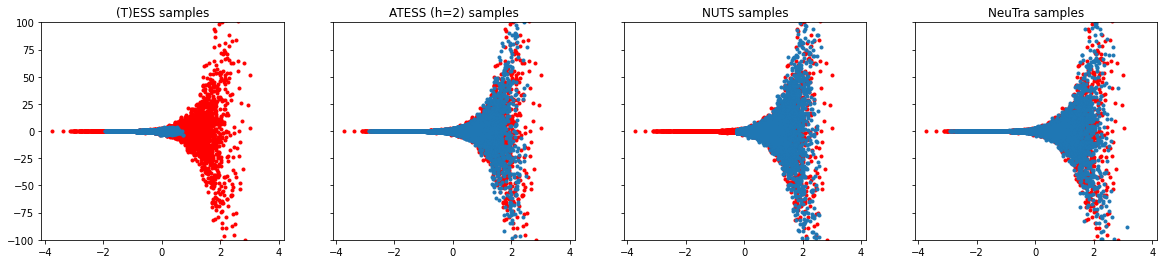

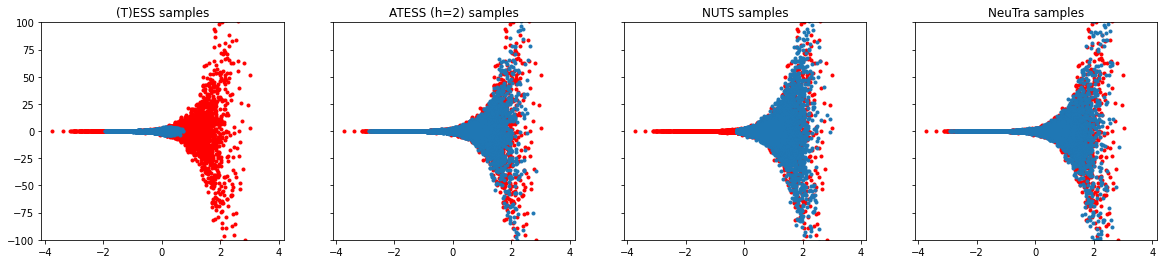

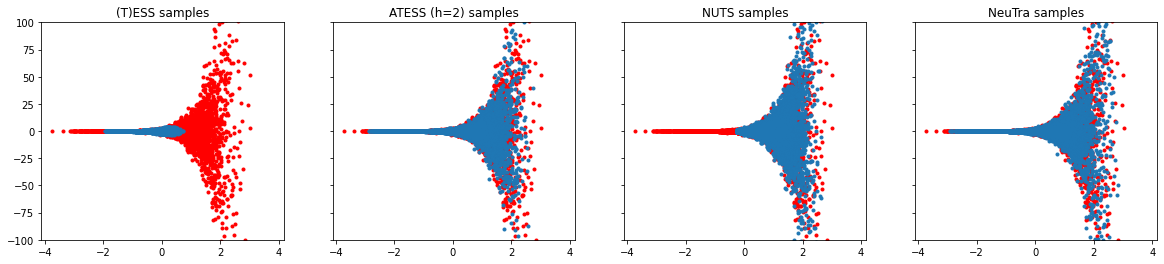

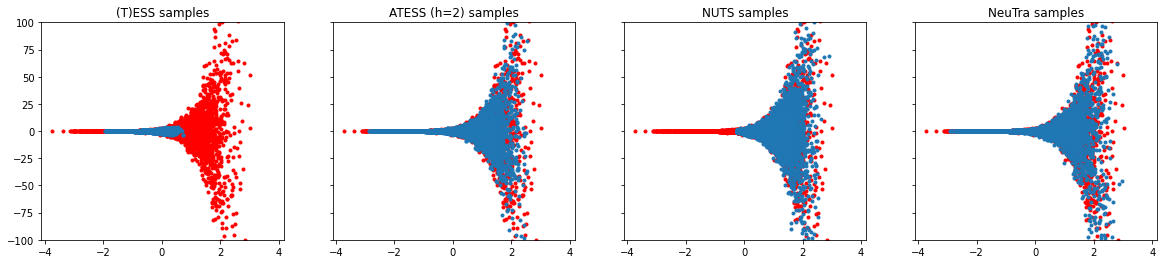

In [6]:
for i in range(9):
    compare_plots(i)

In [23]:
def compare_plot_poster():
    samples = jnp.load('nealsfunnel_coupling_kld_elu_2.npz', allow_pickle=True)
    ess = samples['ess_samples'].item()
    atess2 = samples['atess_samples'].item()
    nuts = samples['nuts_samples'].item()
    neutra = samples['neutra_samples'].item()
    samples = jnp.load('nealsfunnel_coupling_kld_elu_1.npz', allow_pickle=True)
    atess1 = samples['atess_samples'].item()
    samples = jnp.load('nealsfunnel_coupling_kld_elu_0.npz', allow_pickle=True)
    atess0 = samples['atess_samples'].item()
    
    np.random.seed(0)
    c, n = ess["x1"].shape
    x1 = np.random.normal(0., 1., size=c * n)
    x2 = np.random.normal(0., jnp.exp(2. * x1))
    
    fig, ax = plt.subplots(1, 6, figsize=(35, 4), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    ax[0].plot(x1, x2, '.', color='r', alpha=1.)
    ax[0].plot(ess["x1"].reshape(-1), ess["x2"].reshape(-1), '.', alpha=1)
    ax[1].set_title("ATESS (h=0) samples")
    ax[1].plot(x1, x2, '.', color='r', alpha=1)
    ax[1].plot(atess0["x1"].reshape(-1), atess0["x2"].reshape(-1), '.', alpha=1)
    ax[2].set_title("ATESS (h=1) samples")
    ax[2].plot(x1, x2, '.', color='r', alpha=1)
    ax[2].plot(atess1["x1"].reshape(-1), atess1["x2"].reshape(-1), '.', alpha=1)
    ax[3].set_title("ATESS (h=2) samples")
    ax[3].plot(x1, x2, '.', color='r', alpha=1)
    ax[3].plot(atess2["x1"].reshape(-1), atess2["x2"].reshape(-1), '.', alpha=1)
    ax[4].set_title("NUTS samples")
    ax[4].plot(x1, x2, '.', color='r', alpha=1)
    ax[4].plot(nuts["x1"].reshape(-1), nuts["x2"].reshape(-1), '.', alpha=1)
    ax[5].set_title("NeuTra samples")
    ax[5].plot(x1, x2, '.', color='r', alpha=1)
    ax[5].plot(neutra["x1"].reshape(-1), neutra["x2"].reshape(-1), '.', alpha=1)

    ax[3].set_ylim(-100, 100)
    
    fig.savefig('nealsfunnel.png', bbox_inches='tight')

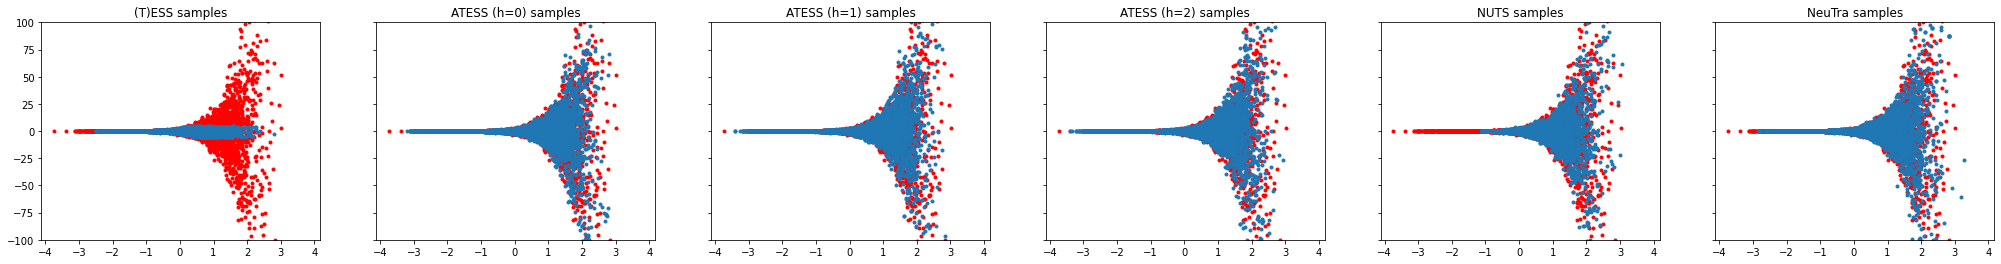

In [24]:
compare_plot_poster()

In [69]:
samples = jnp.load('nealsfunnel_coupling_kld_elu_0.npz', allow_pickle=True)

In [13]:
ess = samples['ess_samples'].item()
atess = samples['atess_samples'].item()
atess_flow = samples['atess_flow_samples'].item()
nuts = samples['nuts_samples'].item()
neutra = samples['neutra_samples'].item()
neutra_flow = samples['neutra_flow_samples'].item()

In [14]:
def compare_plot_contour(logprob, ess, atess, nuts, neutra):
    np.random.seed(0)
    c, n = ess["x1"].shape
    x1 = np.random.normal(0., 1., size=c * n)
    x2 = np.random.normal(0., jnp.exp(2. * x1))
    
    fig, ax = plt.subplots(1, 4, figsize=(17, 3), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    ax[0].plot(x1, x2, '.', color='r', alpha=1.)
    ax[0].plot(ess["x1"].reshape(-1), ess["x2"].reshape(-1), '.', alpha=1)
    ax[1].set_title("ATESS samples")
    ax[1].plot(x1, x2, '.', color='r', alpha=1)
    ax[1].plot(atess["x1"].reshape(-1), atess["x2"].reshape(-1), '.', alpha=1)
    ax[2].set_title("NUTS samples")
    ax[2].plot(x1, x2, '.', color='r', alpha=1)
    ax[2].plot(nuts["x1"].reshape(-1), nuts["x2"].reshape(-1), '.', alpha=1)
    ax[3].set_title("NeuTra samples")
    ax[3].plot(x1, x2, '.', color='r', alpha=1)
    ax[3].plot(neutra["x1"].reshape(-1), neutra["x2"].reshape(-1), '.', alpha=1)

    ax[3].set_ylim(-100, 100)

In [15]:
def nealsfunnel(x1, x2):
    """Neal's Funnel density"""
    return stats.norm.logpdf(x1, 0.0, 1.) + stats.norm.logpdf(
        x2, 0., jnp.exp(2. * x1)
    )
nealsfunnel_fn = lambda x: nealsfunnel(**x)

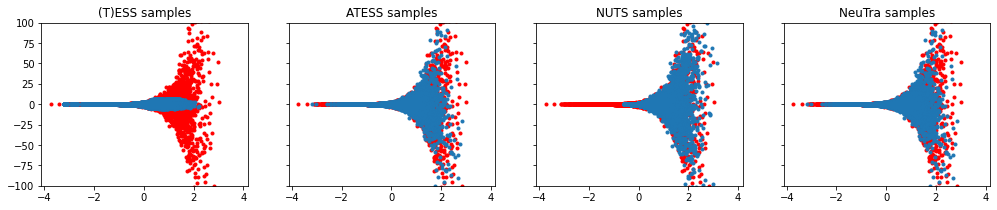

In [16]:
#epoch 0
compare_plot_contour(nealsfunnel_fn, ess, atess_flow, nuts, neutra_flow)

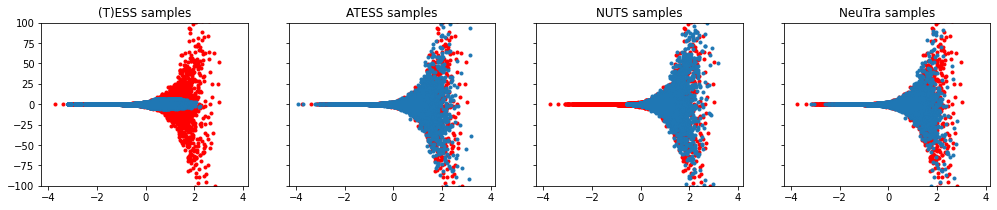

In [10]:
#epoch 1
compare_plot_contour(nealsfunnel_fn, ess, atess_flow, nuts, neutra_flow)

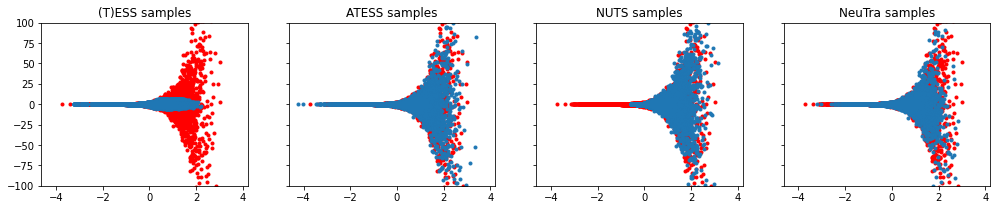

In [6]:
#epoch 2
compare_plot_contour(nealsfunnel_fn, ess, atess_flow, nuts, neutra_flow)

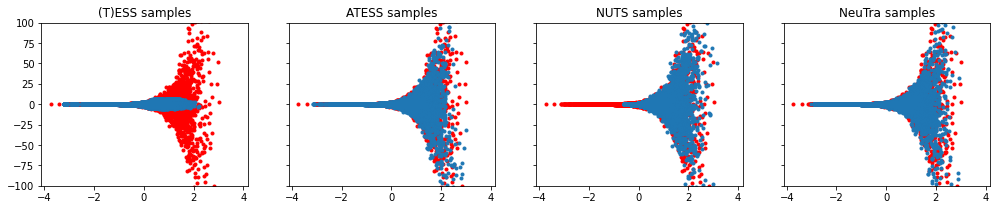

In [17]:
#epoch 0
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

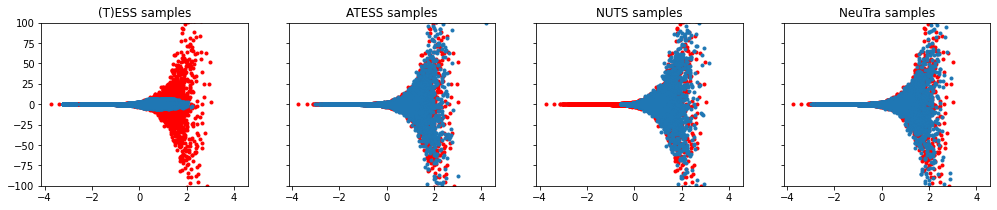

In [11]:
#epoch 1
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

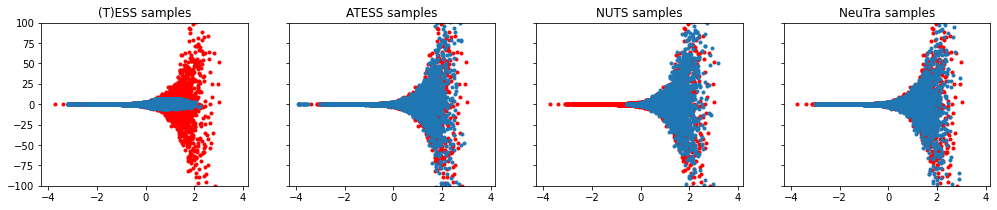

In [7]:
#epoch 2
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

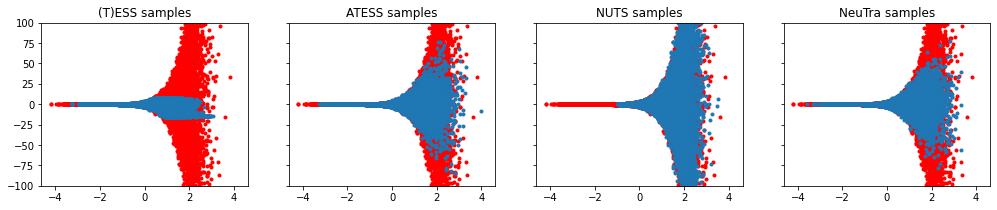

In [17]:
#epoch 0
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

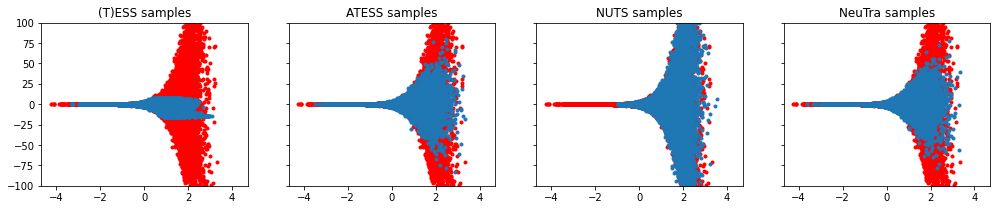

In [20]:
#epoch 1
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

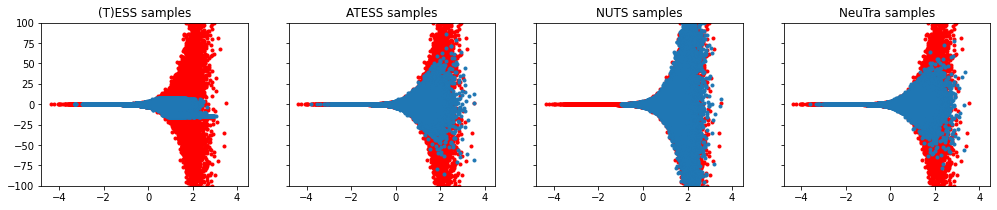

In [23]:
#epoch 2
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

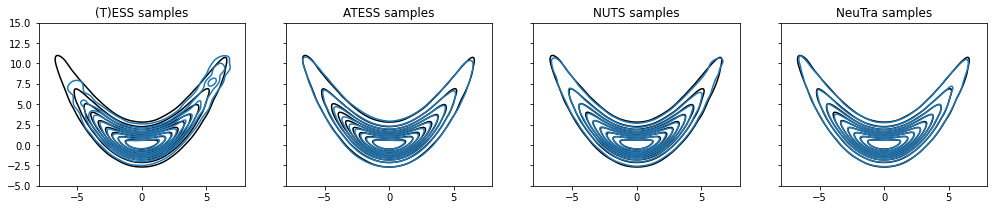

In [17]:
#epoch 3
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

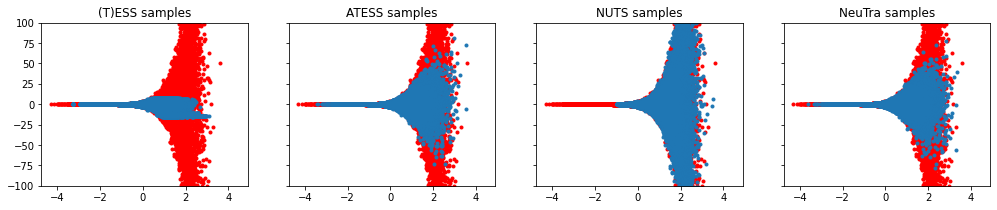

In [26]:
#epoch 4
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

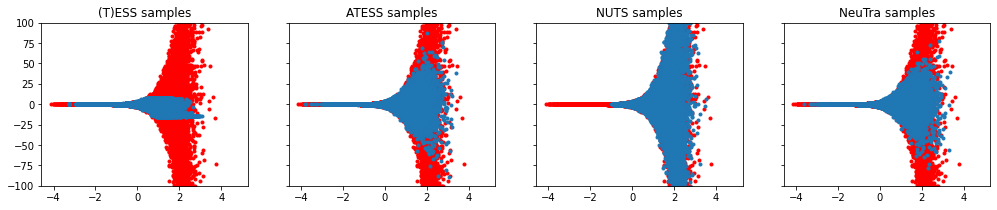

In [29]:
#epoch 4 with tol=0.01 w/ neutra only transformation
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

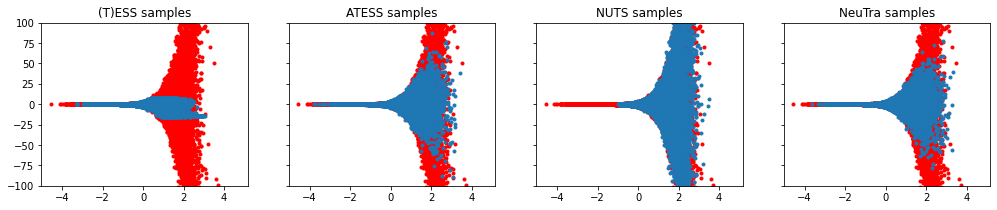

In [30]:
#epoch 5
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

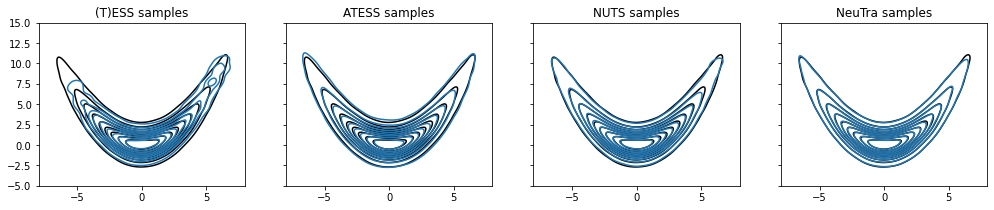

In [10]:
#epoch 6
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

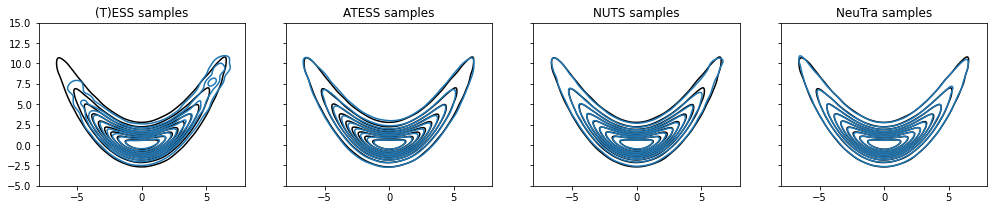

In [13]:
#epoch 7
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

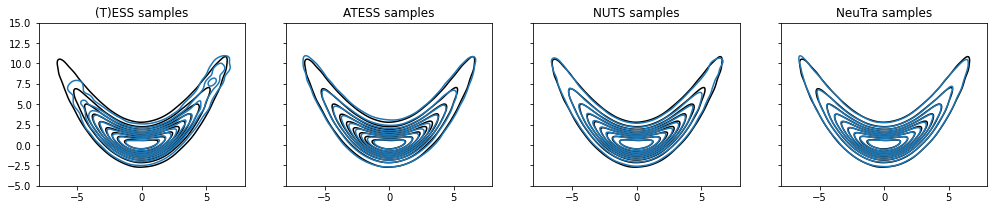

In [16]:
#epoch 8
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

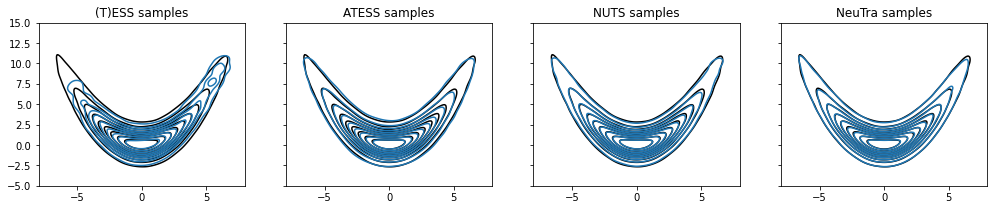

In [23]:
#epoch 9
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

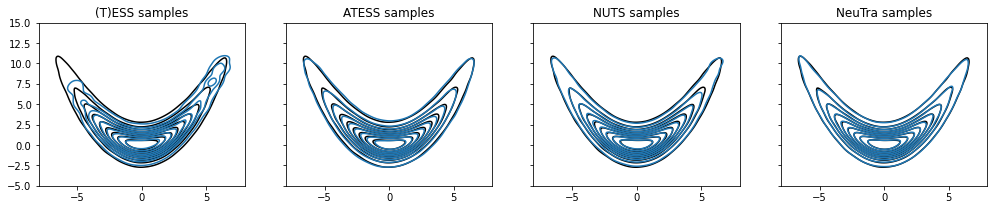

In [20]:
#epoch 10
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

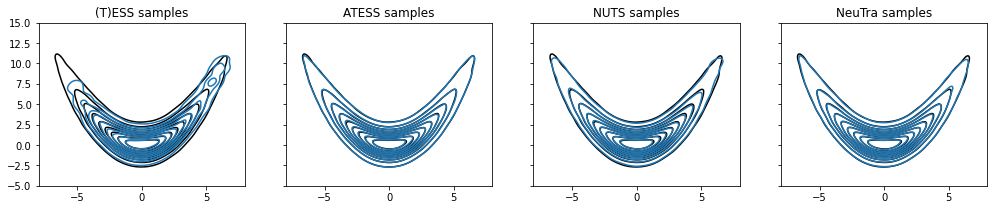

In [6]:
#samplers
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

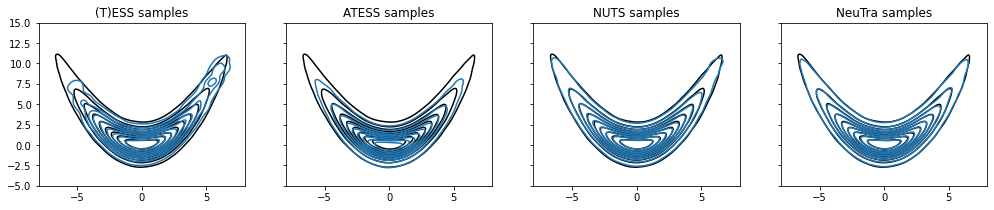

In [8]:
#prev_samplers
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)